In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
import folium
import plotly.express as px


In [43]:
df=pd.read_csv('baseball.csv')


In [44]:
df

W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [45]:
df=df.rename(columns={'W':'Wins','R':'Runs','AB':'At Bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'Stolen Bases','RA':'RunsAllowed','ER':'Earned Runs','ERA':'Earned Runs Avg','CG':'CG','SHO':'Shutouts','SV':'Saves','E':'Errors'})

In [5]:
df.describe()

Wins        Runs      At Bats         Hits     Doubles  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

         Triples    Homeruns       Walks  Strikeouts  Stolen Bases  \
count  30.000000   30.000000   30.000000    30.00000     30.000000   
mean   31.300000  163.633333  469.100000  1248.20000     83.500000   
std    10.452355   31.823309   57.053725   103.75947     22.815225   
min    13.000000  100.000000  375.000000   973.00000     44.000000   
25%    23.000000  140.250000  428.250000  1157.50000     69.000000   
50%    31.000000  158.500000  473.000000  1261.50000     83.500000   
75%    39.000000  177.000000  501.250000  1311.50000     96.500000   
max    49.000000  232.000000  570.000000  1518.00000    134.000000   

       RunsAllowed  Earned Runs  Earned Runs Avg         CG   Shutouts  \
count    30.000000    30.000000        30.000000  30.000000  30.000000   
mean    688.233333   635.833333         3.956333   3.466667  11.300000   
std      72.108005    70.140786         0.454089   2.763473   4.120177   
min     525.000000   478.000000         2.940000   0.000000   4.000000   
25%     636.250000   587.250000         3.682500   1.000000   9.000000   
50%     695.500000   644.500000         4.025000   3.000000  12.000000   
75%     732.500000   679.250000         4.220000   5.750000  13.000000   
max     844.000000   799.000000         5.040000  11.000000  21.000000   

           Saves      Errors  
count  30.000000   30.000000  
mean   43.066667   94.333333  
std     7.869335   13.958889  
min    28.000000   75.000000  
25%    37.250000   86.000000  
50%    42.000000   91.000000  
75%    46.750000   96.750000  
max    62.000000  126.000000

In [6]:
df.isnull().sum()

Wins               0
Runs               0
At Bats            0
Hits               0
Doubles            0
Triples            0
Homeruns           0
Walks              0
Strikeouts         0
Stolen Bases       0
RunsAllowed        0
Earned Runs        0
Earned Runs Avg    0
CG                 0
Shutouts           0
Saves              0
Errors             0
dtype: int64

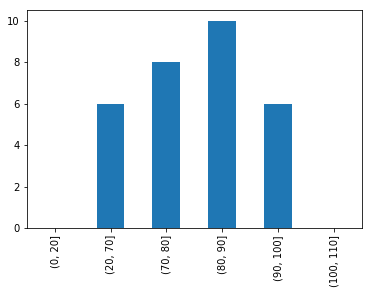

In [7]:
bins=[0,20,70,80,90,100,110]
df['Winbins']=pd.cut(df['Wins'],bins)
df['Winbins'].value_counts().sort_index().plot.bar()

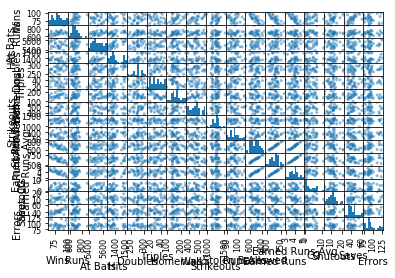

In [8]:
scatter_matrix(df)
plt.show()

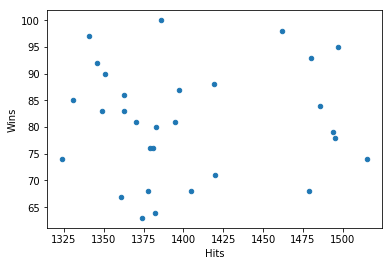

In [9]:
df.plot.scatter(x = 'Hits', y = 'Wins')

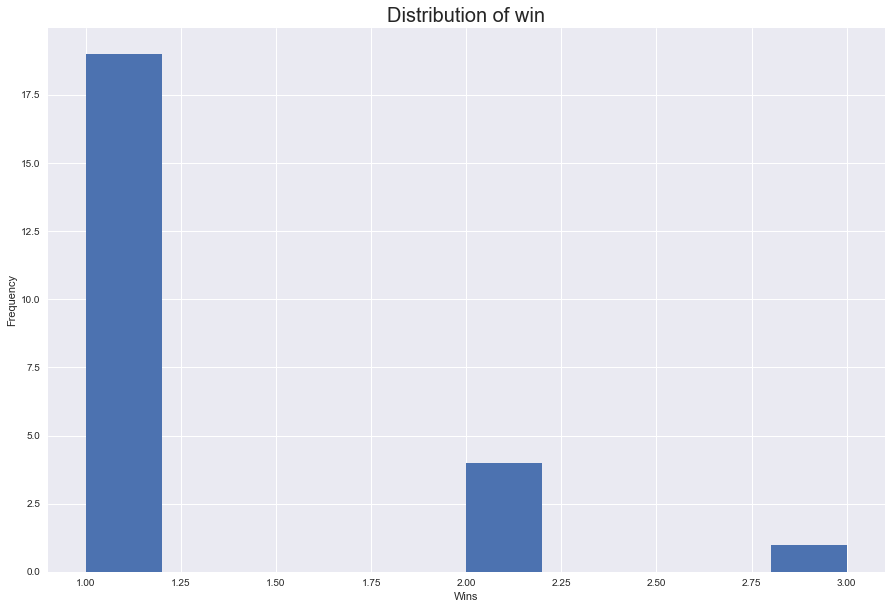

In [10]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')
df['Wins'].value_counts().plot.hist( figsize = (15, 10))
plt.xlabel('Wins')
plt.title('Distribution of win',fontsize = 20)
plt.show()

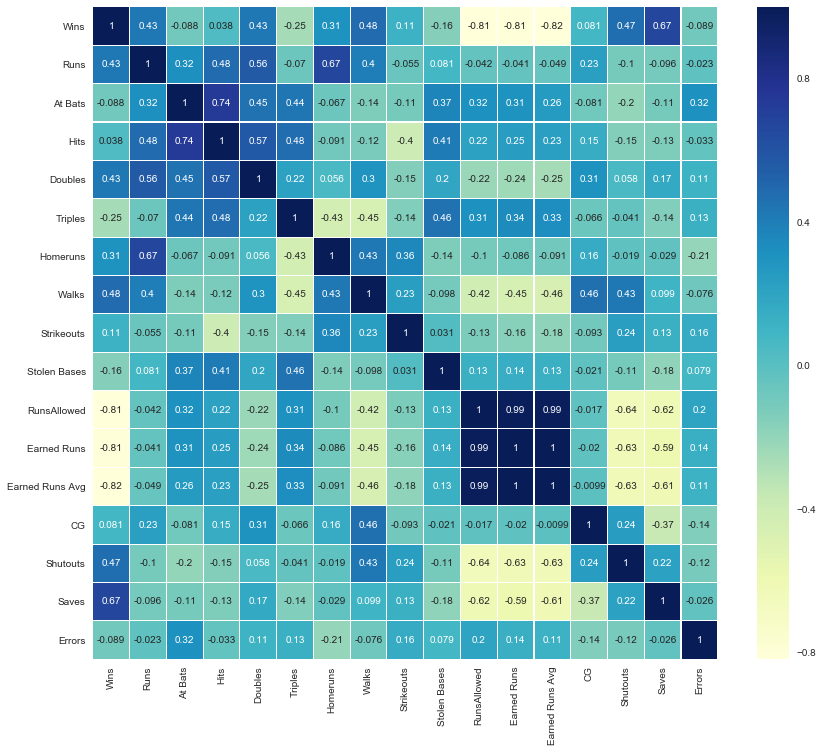

In [11]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [12]:
fig = px.scatter(df,x='Wins',y='Runs')
fig.show()

In [13]:
fig = px.scatter(df,x='Wins',y='Earned Runs')
fig.show()

In [14]:
fig = px.scatter(df,x='Wins',y='Earned Runs Avg')
fig.show()

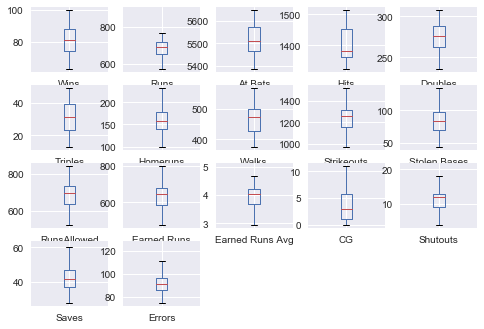

In [15]:
df.plot(kind='box',subplots=True, layout=(4,5), sharex =False , sharey =False)
plt.show()

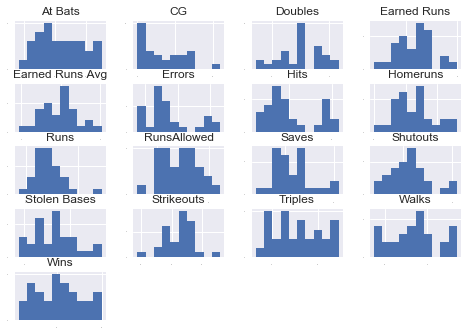

In [16]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

In [17]:
df.shape

(30, 18)

In [18]:
df.describe

<bound method NDFrame.describe of     Wins  Runs  At Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0     95   724     5575  1497      300       42       139    383         973   
1     83   696     5467  1349      277       44       156    439        1264   
2     81   669     5439  1395      303       29       141    533        1157   
3     76   622     5533  1381      260       27       136    404        1231   
4     74   689     5605  1515      289       49       151    455        1259   
5     93   891     5509  1480      308       17       232    570        1151   
6     87   764     5567  1397      272       19       212    554        1227   
7     81   713     5485  1370      246       20       217    418        1331   
8     80   644     5485  1383      278       32       167    436        1310   
9     78   748     5640  1495      294       33       161    478        1148   
10    88   751     5511  1419      279       32       172    503        1233   
11    

C:\Users\GT\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.

C:\Users\GT\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\GT\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\GT\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



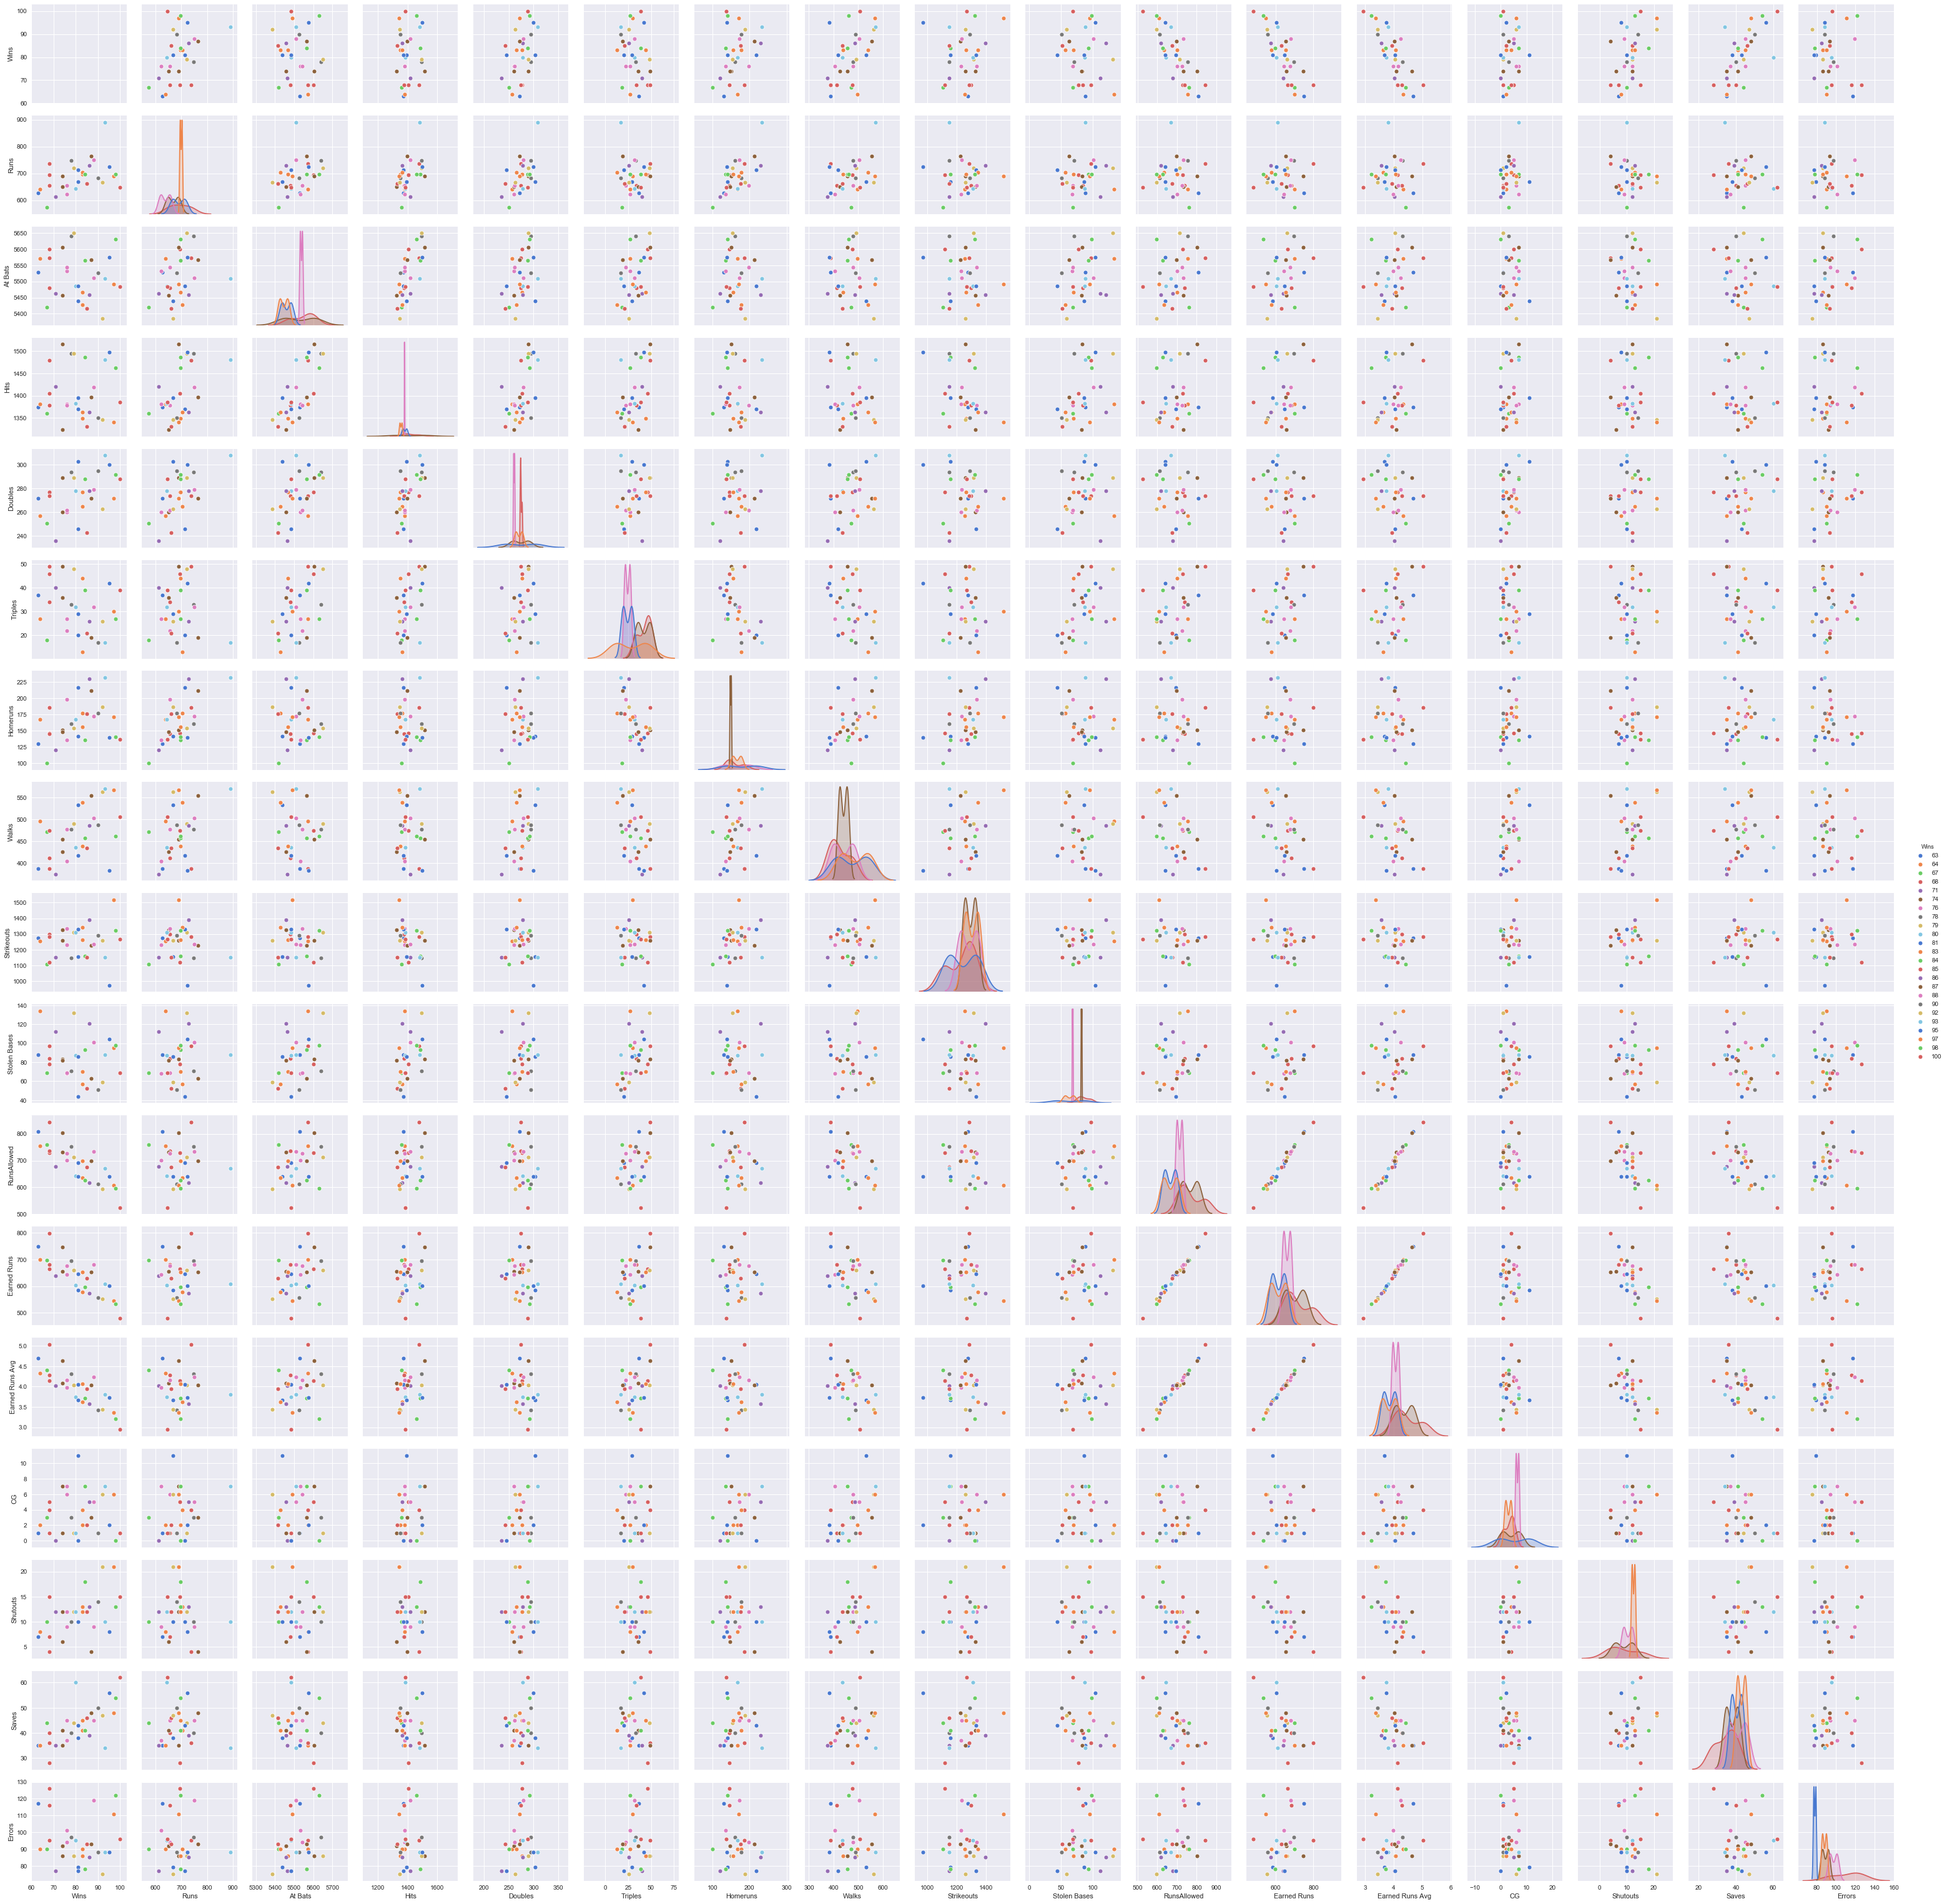

In [19]:
sns.pairplot(df,hue='Wins',
             palette = sns.color_palette("muted"), size=2.5)

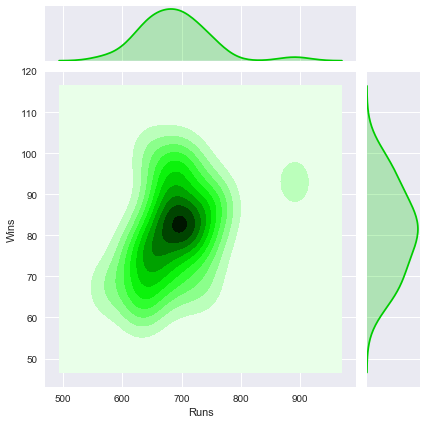

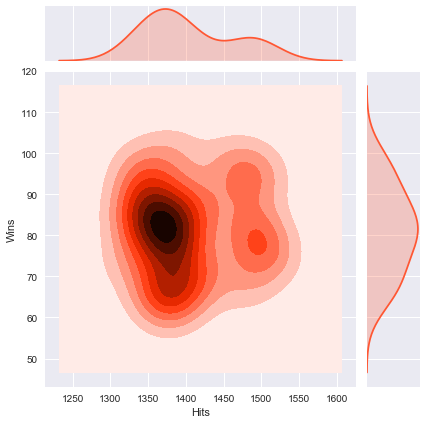

In [20]:
sns.jointplot(df.Runs,df.Wins, color="#00cc00",kind='kde')
sns.jointplot(df.Hits,df.Wins, color="#FF5733",kind='kde')


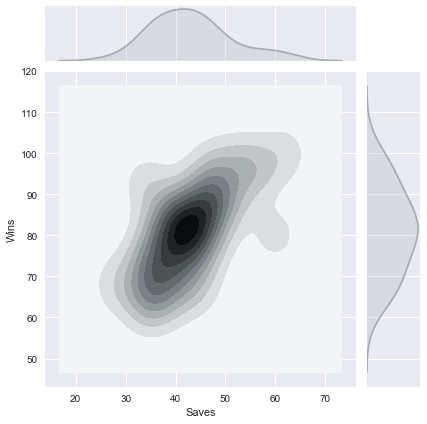

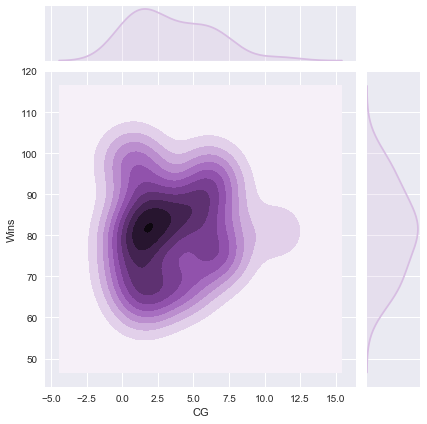

In [21]:
sns.jointplot(df['Saves'],df.Wins, color="#A6ACAF",kind='kde')
sns.jointplot(df.CG,df.Wins, color="#D7BDE2",kind='kde')

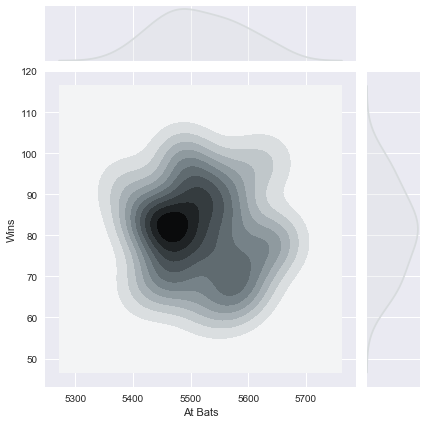

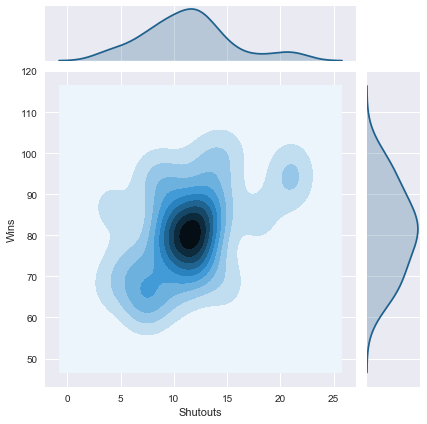

In [22]:
sns.jointplot(df['At Bats'],df.Wins, color="#D7DBDD",kind='kde')
sns.jointplot(df.Shutouts,df.Wins, color="#1F618D",kind='kde')

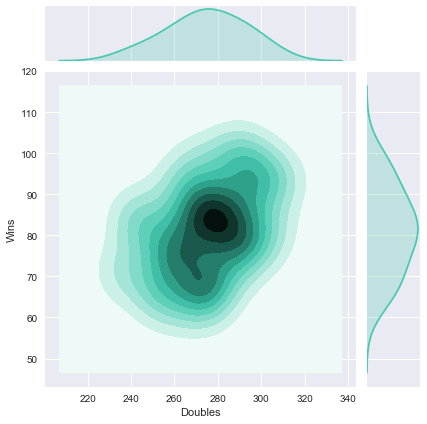

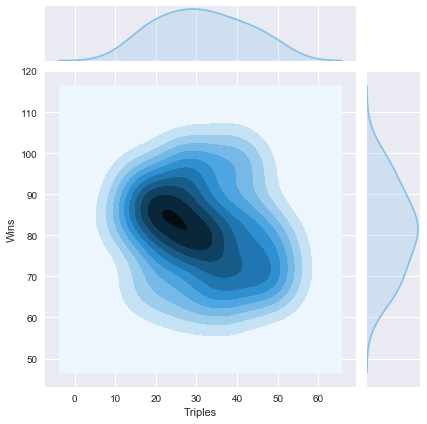

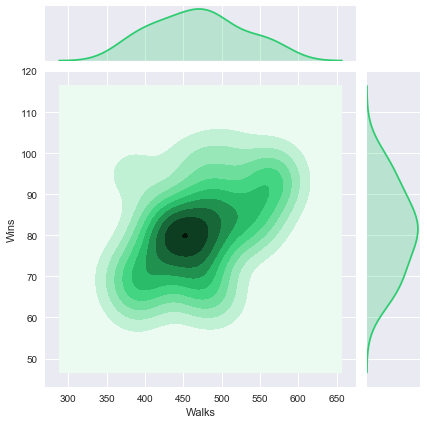

In [23]:
sns.jointplot(df.Doubles,df.Wins, color="#48C9B0",kind='kde')
sns.jointplot(df.Triples,df.Wins, color="#85C1E9",kind='kde')
sns.jointplot(df['Walks'],df.Wins, color="#2ECC71",kind='kde')

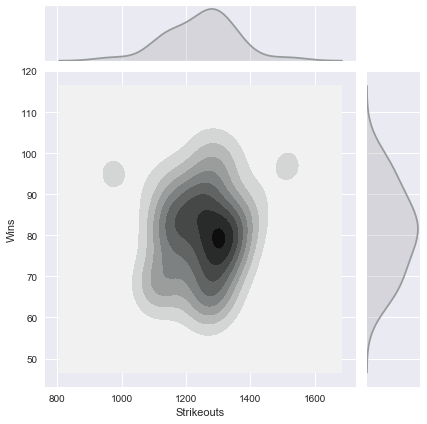

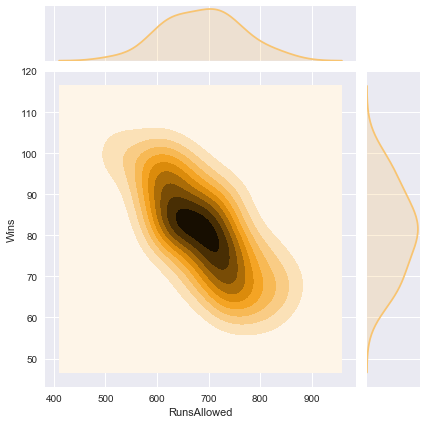

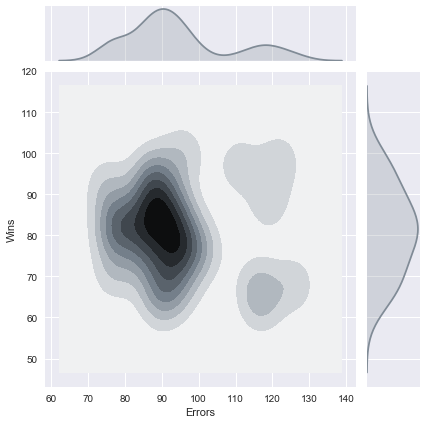

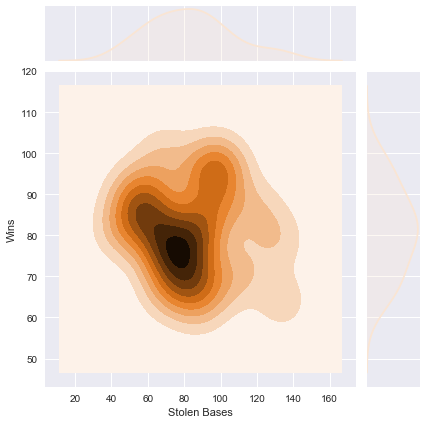

In [24]:
sns.jointplot(df.Strikeouts,df.Wins, color="#979A9A",kind='kde')
sns.jointplot(df.RunsAllowed,df.Wins, color="#F8C471",kind='kde')#density plot
sns.jointplot(df.Errors,df.Wins, color="#808B96",kind='kde')#density plot
sns.jointplot(df['Stolen Bases'],df.Wins, color="#FAE5D3",kind='kde')

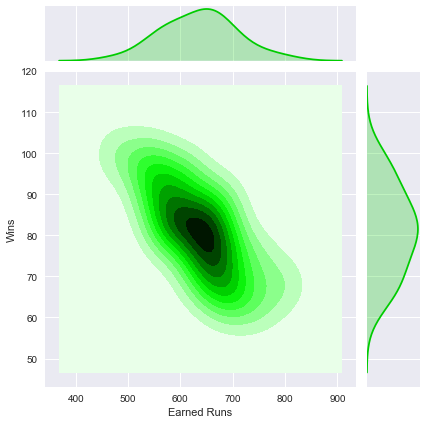

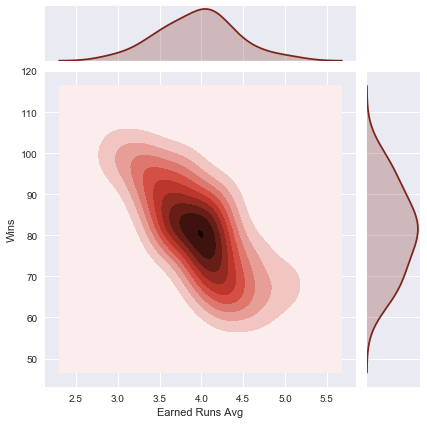

In [25]:

sns.jointplot(df['Earned Runs'],df.Wins, color="#00cc00",kind='kde')#density plot
sns.jointplot(df['Earned Runs Avg'],df.Wins, color="#7B241C",kind='kde')

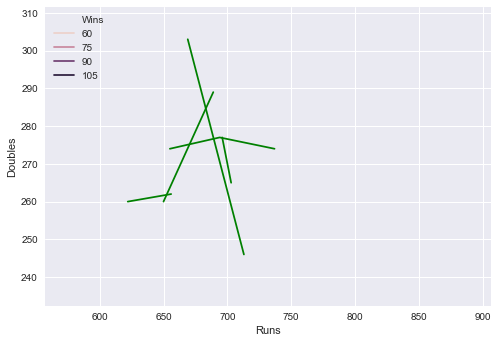

In [26]:
ax = sns.lineplot(x="Runs", y="Doubles", hue="Wins", data=df,Color='g')

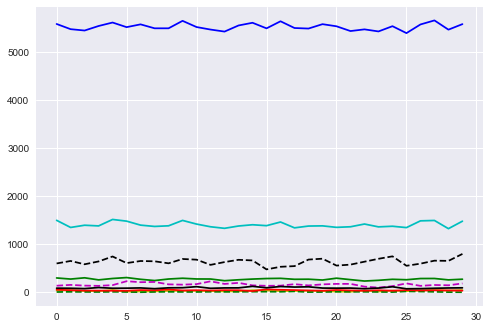

In [28]:

plt.plot(df["At Bats"], 'b-', df["Hits"], 'c-', df["Doubles"], 'g-', df["Triples"], 'y-',df['Homeruns'], 'm--', df['Earned Runs'], 'k--', df['Shutouts'], 'g--', df['Saves'],'r-', df['Errors'],'k-')

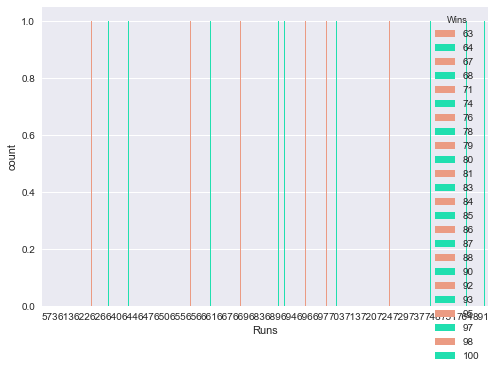

In [29]:
sns.countplot(x = "Runs", hue = "Wins", data = df, palette=["#fc9272",         "#00ffbf"])

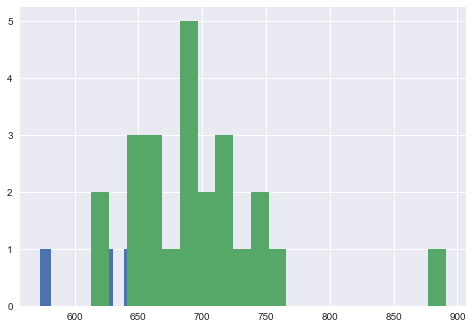

In [30]:
df[df.Wins<=70].Runs.hist(bins=20);
df[df.Wins>=70].Runs.hist(bins=20);

In [31]:
import plotly.express as px

fig = px.scatter(df, x='Earned Runs Avg', y="Runs",color="Wins")

fig.show()

In [32]:
fig = px.scatter(df, x='Doubles', y="Wins",color="At Bats")
fig.show()

In [33]:
fig = px.scatter(df, x='Errors', y="Wins",color="At Bats")
fig.show()

In [37]:
ac=df['Doubles'].sum()
rvd=df['Triples'].sum()
dth=df['Homeruns'].sum()

In [38]:
ac

8242

In [39]:
import plotly.graph_objs as go
fig = go.Figure(data=[go.Pie(labels=['Doubles','Triples','Homeruns'],
                             values= [ac,rvd,dth],hole =.3)])
fig.update_layout(title_text='Run Data Sharing Ratio',plot_bgcolor='rgb(275, 270, 273)')
fig.show()

In [40]:
temp=df.copy()
fig = go.Figure(data=[
go.Bar(name='Doubles', x=df['Runs'], y=df['Doubles'],marker_color='#ff0000'),
go.Bar(name='Triples', x=df['Runs'], y=df['Triples'],marker_color='#2bad57'),
go.Bar(name='Homeruns', x=df['Runs'], y=df['Homeruns'],marker_color='#326ac7')])
fig.update_layout(barmode='stack')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(title_text='Total run sharing percentage',
                  plot_bgcolor='rgb(335, 304, 400)')
fig.show()

In [41]:
fig = px.line(df, x="Wins", y="Homeruns", 
              title="Win Dependency on Homerun", 
              log_y=True,template='gridon',width=600, height=600)
fig.show()

In [42]:
df['Wins'] = pd.to_numeric(df['Wins'], errors='coerce')
df['Runs']= pd.to_numeric(df['Runs'], errors='coerce')
df['At Bats']= pd.to_numeric(df['At Bats'], errors='coerce')
df['Hits']= pd.to_numeric(df['Hits'], errors='coerce')
df['Doubles'] = pd.to_numeric(df['Doubles'], errors='coerce')
df['Triples'] = pd.to_numeric(df['Triples'], errors='coerce')
df['Homeruns'] = pd.to_numeric(df['Homeruns'], errors='coerce')
df['Walks']= pd.to_numeric(df['Walks'], errors='coerce')
df['Strikeouts'] = pd.to_numeric(df['Strikeouts'], errors='coerce')
df['Stolen Bases'] = pd.to_numeric(df['Stolen Bases'], errors='coerce')
df['RunsAllowed'] = pd.to_numeric(df['RunsAllowed'], errors='coerce')
df['Earned Runs'] = pd.to_numeric(df['Earned Runs'], errors='coerce')
df['Earned Runs Avg'] = pd.to_numeric(df['Earned Runs Avg'], errors='coerce')
df['CG'] = pd.to_numeric(df['CG'], errors='coerce')
df['Shutouts'] = pd.to_numeric(df['Shutouts'], errors='coerce')
df['Saves'] = pd.to_numeric(df['Saves'], errors='coerce')
df['Errors'] = pd.to_numeric(df['Errors'], errors='coerce')

KeyError: 'Runs'

In [ ]:
lm = LinearRegression()

#Slicing of Datasets
x_train = pd.DataFrame(df.iloc[:,0].values)
y_train = pd.DataFrame(df.iloc[:,1].values)

x_test = pd.DataFrame(df.iloc[:,0].values)
y_test = pd.DataFrame(df.iloc[:,1].values)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.as_matrix)
X_test = sc.transform(X_test.as_matrix)

In [ ]:
lm.fit(x_train,y_train)